# IMPORTS

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import pickle

from imblearn.over_sampling      import SMOTE
from imblearn.under_sampling     import RandomUnderSampler

from sklearn.model_selection  import train_test_split

# LOADING

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
for f in data:
    a = abs(len(f) - 20)
    print(f + (" " * a)  + str(data[f].dtypes))

ID                  int64
LIMIT_BAL           int64
SEX                 int64
EDUCATION           int64
MARRIAGE            int64
AGE                 int64
PAY_0               int64
PAY_2               int64
PAY_3               int64
PAY_4               int64
PAY_5               int64
PAY_6               int64
BILL_AMT1           int64
BILL_AMT2           int64
BILL_AMT3           int64
BILL_AMT4           int64
BILL_AMT5           int64
BILL_AMT6           int64
PAY_AMT1            int64
PAY_AMT2            int64
PAY_AMT3            int64
PAY_AMT4            int64
PAY_AMT5            int64
PAY_AMT6            int64
default payment next month      int64


## Data Dimensions

In [5]:
print("Rows: {}\nColumns:{}".format(data.shape[0], data.shape[1]))

Rows: 30000
Columns:25


## Null Values

In [6]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Storaging data in df

In [8]:
df = data.copy()

In [9]:
df.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
16617,16618,310000,1,2,2,45,-1,-1,-1,-1,...,1788,1927,553,1217,31967,1796,1936,556,15664,0
1411,1412,450000,1,3,1,58,-1,-1,-1,-1,...,9856,819,863,6271,5740,9905,823,867,2488,0
13322,13323,360000,2,2,1,59,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


# MANIPULATION

In [10]:
df.drop(['ID'], axis = 1, inplace = True)

In [11]:
df.rename(columns={'default payment next month': 'DEFAULTING PERSON'}, inplace = True)

## Converting numeric columns into string

In [12]:
col = ['SEX','EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6', 'DEFAULTING PERSON' ]

df[col] = df[col].astype(str)

In [13]:
# data types
for f in df:
    a = abs(len(f) - 20)
    print(f + (" " * a)  + str(df[f].dtypes))

LIMIT_BAL           int64
SEX                 object
EDUCATION           object
MARRIAGE            object
AGE                 int64
PAY_0               object
PAY_2               object
PAY_3               object
PAY_4               object
PAY_5               object
PAY_6               object
BILL_AMT1           int64
BILL_AMT2           int64
BILL_AMT3           int64
BILL_AMT4           int64
BILL_AMT5           int64
BILL_AMT6           int64
PAY_AMT1            int64
PAY_AMT2            int64
PAY_AMT3            int64
PAY_AMT4            int64
PAY_AMT5            int64
PAY_AMT6            int64
DEFAULTING PERSON   object


In [14]:
# numerical attributes
num_attributes = df.select_dtypes(include=['int64', 'float64'])

# Categorical attributes
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [15]:
num_attributes.sample(4)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
26982,170000,44,159094,161938,166062,170023,173854,179390,6000,7000,7000,7000,8000,7000
12303,240000,56,138785,141894,143270,201082,215709,204302,6500,5000,60000,17464,6516,20002
17548,60000,48,50806,50980,51874,51808,16941,17295,2000,2100,1400,600,1000,1000
11337,120000,38,52234,39644,19920,9155,14155,3867,1575,1800,1500,14000,4000,2850


In [16]:
cat_attributes.sample(4)

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULTING PERSON
17306,2,2,2,-1,-1,-1,-1,-1,-2,0
26471,2,3,1,-1,-1,-1,-1,-1,-1,0
10487,2,1,1,0,0,0,0,0,0,1
202,2,1,2,-1,0,-1,-1,-1,-1,0


In [17]:
# Central Tendency: mean, median, mode

ct1 = pd.DataFrame(num_attributes.apply(np.mean).round(2)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T


# Dispersion: std, min, max, range

d1 = pd.DataFrame(num_attributes.apply(np.std).round(2)).T
d2 = pd.DataFrame(num_attributes.apply(min).round(2)).T
d3 = pd.DataFrame(num_attributes.apply(max).round(2)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# Concat

t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['Attributes', 'Mean', 'Median', 'Std', 'Min', 'Max', 'Range']
t

,Attributes,Mean,Median,Std,Min,Max,Range
0,LIMIT_BAL,167484.32,140000.0,129745.50,10000.0,1000000.0,990000.0
1,AGE,35.49,34.0,9.22,21.0,79.0,58.0
2,BILL_AMT1,51223.33,22381.5,73634.63,-165580.0,964511.0,1130091.0
3,BILL_AMT2,49179.08,21200.0,71172.58,-69777.0,983931.0,1053708.0
4,BILL_AMT3,47013.15,20088.5,69348.23,-157264.0,1664089.0,1821353.0
5,BILL_AMT4,43262.95,19052.0,64331.78,-170000.0,891586.0,1061586.0
6,BILL_AMT5,40311.40,18104.5,60796.14,-81334.0,927171.0,1008505.0
7,BILL_AMT6,38871.76,17071.0,59553.11,-339603.0,961664.0,1301267.0
8,PAY_AMT1,5663.58,2100.0,16563.00,0.0,873552.0,873552.0
9,PAY_AMT2,5921.16,2009.0,23040.49,0.0,1684259.0,1684259.0


## Inconsistent Values

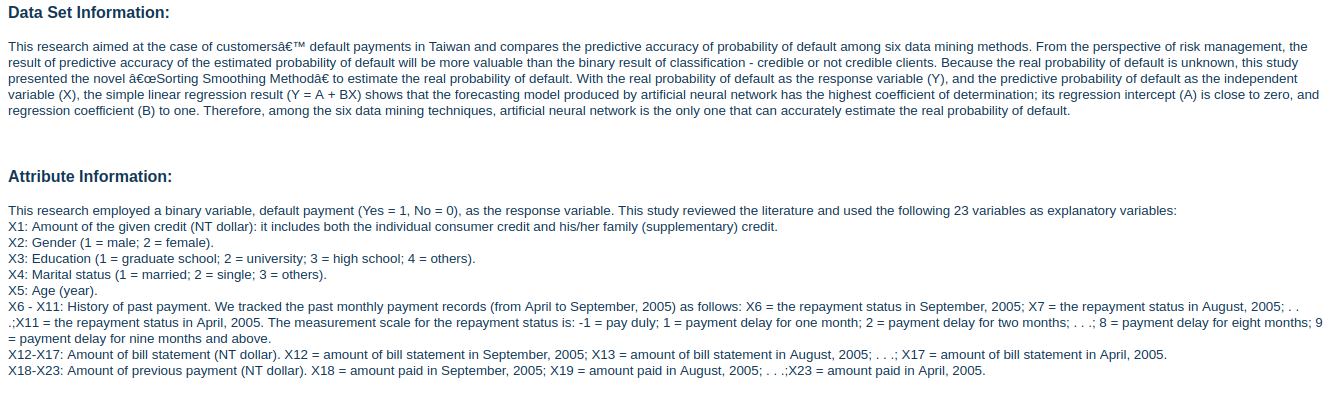

## Education Values: 1 = Graduate School; 2 = University; 3 = High School ; 4 = Others

In [18]:
df['EDUCATION'].unique()

array(['2', '1', '3', '5', '4', '6', '0'], dtype=object)

In [19]:
df['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

Colocando as categorias 0, 5 e 6 dentro da categoria 4

In [20]:
#conditions = [ df['EDUCATION'] == '0', df['EDUCATION'] == '5', df['EDUCATION'] == 6 ]
#choices = ['4', '4', '4']

#df['EDUCATION'] = np.select(conditions, choices, default=np.nan)

In [21]:
df.loc[df.EDUCATION == '0', 'EDUCATION'] = '4'
df.loc[df.EDUCATION == '5', 'EDUCATION'] = '4'
df.loc[df.EDUCATION == '6', 'EDUCATION'] = '4'

In [22]:
df['EDUCATION'].unique()

array(['2', '1', '3', '4'], dtype=object)

## Marital Status: 1 = married; 2 = single; 3 = others

In [23]:
df['MARRIAGE'].unique()

array(['1', '2', '3', '0'], dtype=object)

Colocando a categoria '0' dentro da categoria '3'

In [24]:
df.loc[df.MARRIAGE == '0', 'MARRIAGE'] = '3'

In [25]:
df['MARRIAGE'].unique()

array(['1', '2', '3'], dtype=object)

# PLOTS

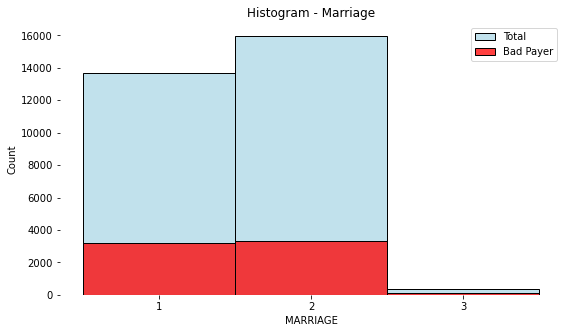

In [35]:
# MARRIAGE VARIABLE

plt.figure(figsize=(9,5))
sns.histplot(data = df['MARRIAGE'].astype(str), bins = 20, color= 'lightblue', label = 'Total')

sns.histplot(data = df['MARRIAGE'][df['DEFAULTING PERSON']=='1'].astype(str), bins = 20, color= 'red', 
             label = 'Bad Payer')

sns.despine(bottom = True, left = True)
plt.legend()

plt.title('Histogram - Marriage');

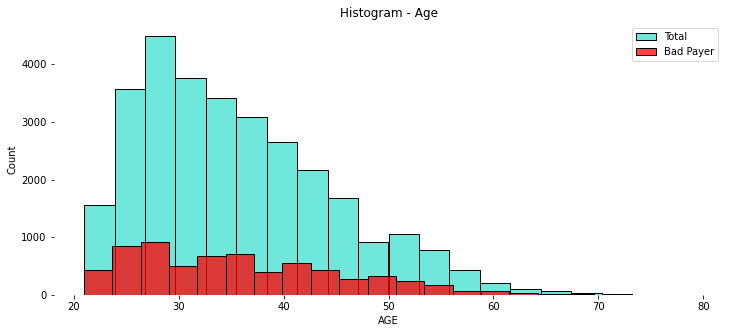

In [33]:
# AGE VARIABLE

plt.figure(figsize=(12,5))
sns.histplot(data = df['AGE'], color= 'turquoise', bins = 20, label = 'Total')
sns.histplot(data = df['AGE'][df['DEFAULTING PERSON']=='1'],bins = 20, color= 'red', label = 'Bad Payer')
sns.despine(bottom = True, left = True)
plt.legend()

plt.title('Histogram - Age');

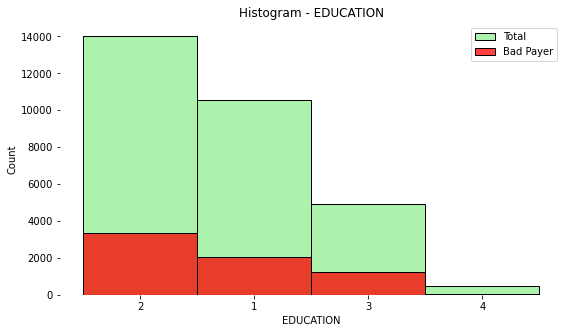

In [30]:
# EDUCATION VARIABLE

plt.figure(figsize=(9,5))
sns.histplot(data = df['EDUCATION'].astype(str), color = 'lightgreen', label = 'Total' )
sns.histplot(data = df['EDUCATION'][df['DEFAULTING PERSON']=='1'].astype(str), color= 'red', label = 'Bad Payer')
sns.despine(bottom = True, left = True)
plt.legend()
plt.title('Histogram - EDUCATION');

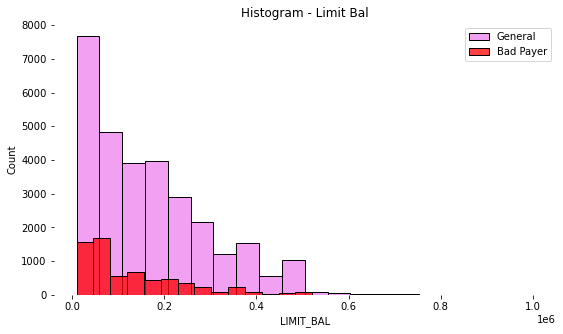

In [37]:
# LIMIT_BAL VARIABLE

plt.figure(figsize=(9,5))
sns.histplot(data = df['LIMIT_BAL'], color = 'violet', bins=20, label = 'General')
sns.histplot(data = df['LIMIT_BAL'][df['DEFAULTING PERSON']=='1'],bins = 20, color= 'red', label = 'Bad Payer')

sns.despine(bottom = True, left = True)
plt.legend()
plt.title('Histogram - Limit Bal');

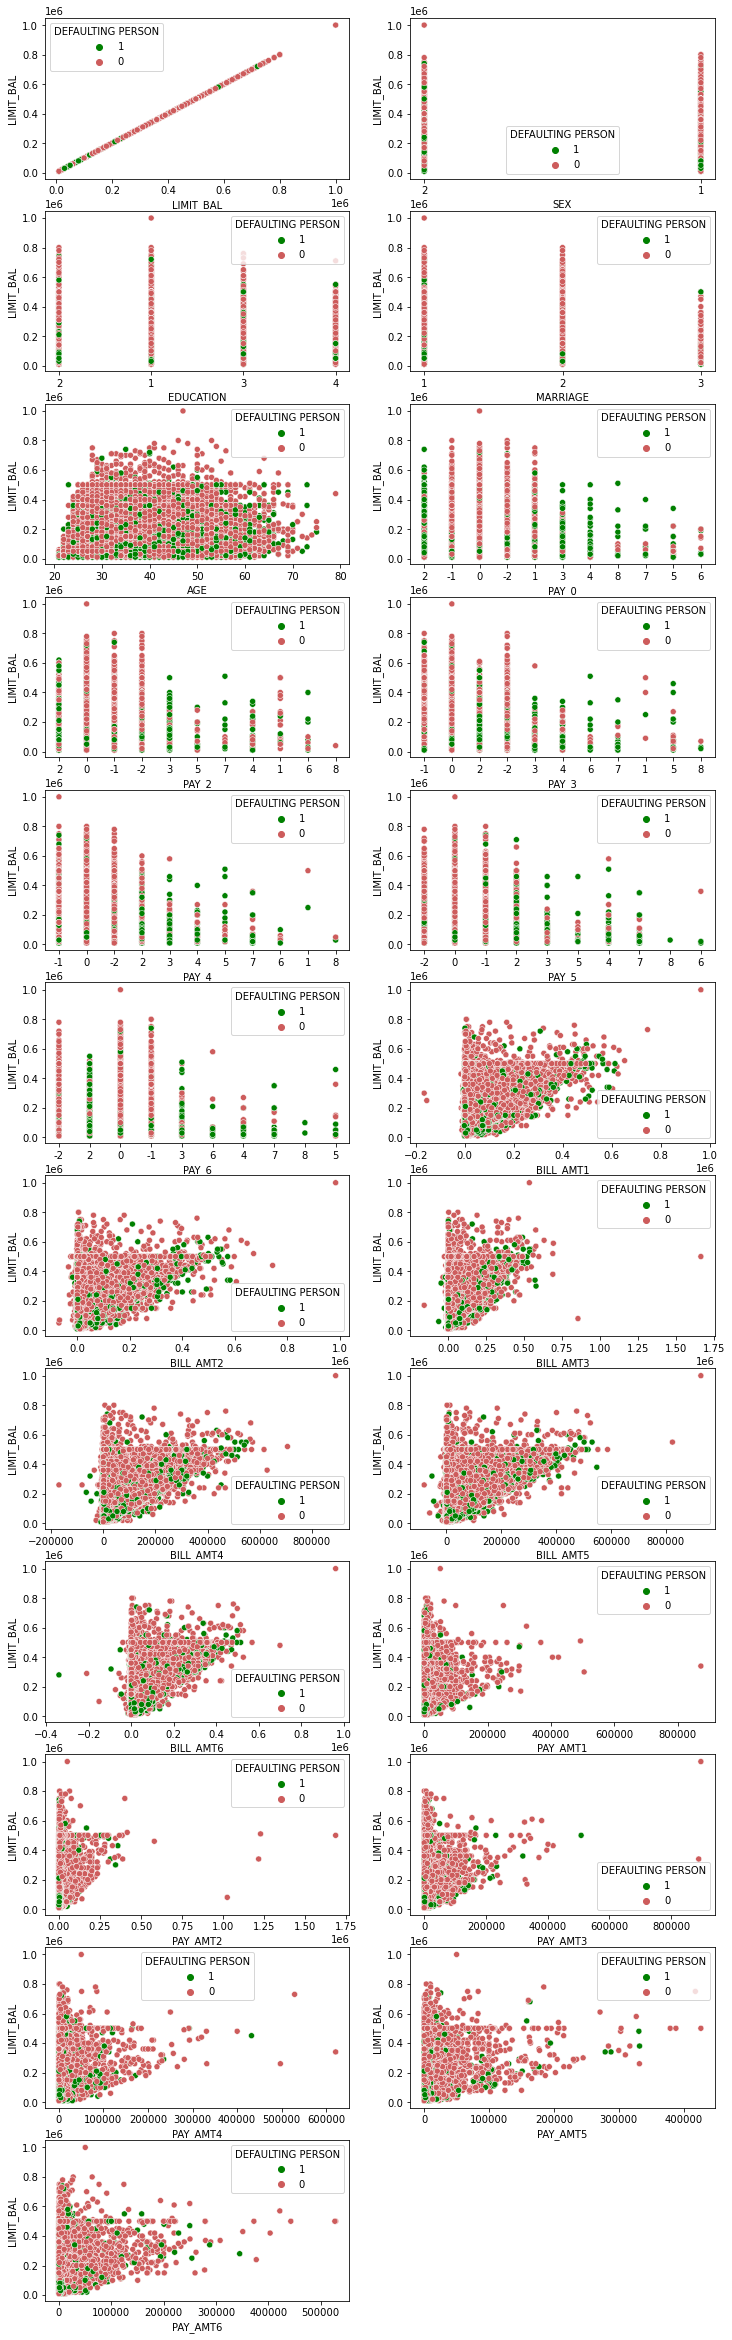

In [39]:
aux = df.drop(['DEFAULTING PERSON'], axis = 1)

plt.figure(figsize=(12,42))
x = 1

for d in aux:
    plt.subplot(12, 2, x)
    sns.scatterplot(data = aux, x = d, y = 'LIMIT_BAL', 
                    hue = df['DEFAULTING PERSON'], palette = ['green', 'indianred'])
    
    x +=1

# RENAMING COLUMNS

In [40]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTING PERSON'],
      dtype='object')

In [41]:
df.rename(columns={'SEX': 'GENDER', 'MARRIAGE':'MARITAL STATUS'}, inplace = True)

# BALANCING DATA

In [42]:
df['DEFAULTING PERSON'].value_counts()

0    23364
1     6636
Name: DEFAULTING PERSON, dtype: int64

In [45]:
class_1 = df['DEFAULTING PERSON'][df['DEFAULTING PERSON'] =='1'].count()
class_0 = df['DEFAULTING PERSON'][df['DEFAULTING PERSON'] =='0'].count()

total_class = df['DEFAULTING PERSON'].count()

In [49]:
print("The percentage of class_0 is {:.1%}".format(class_0/total_class))
print("The percentage of class_1 is {:.1%}".format(1 - class_0/total_class))

The percentage of class_0 is 77.9%
The percentage of class_1 is 22.1%


## SMOTE

In [50]:
df_smote = df.copy()

In [57]:
x_smote = df_smote.drop(['DEFAULTING PERSON'], axis = 1)
y_smote = df_smote['DEFAULTING PERSON']

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=0)

In [58]:
smote = SMOTE(sampling_strategy='auto', random_state=0 )

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [60]:
y_smote.value_counts()

0    23364
1     6636
Name: DEFAULTING PERSON, dtype: int64

In [61]:
y_train_smote.value_counts()

0    17496
1    17496
Name: DEFAULTING PERSON, dtype: int64

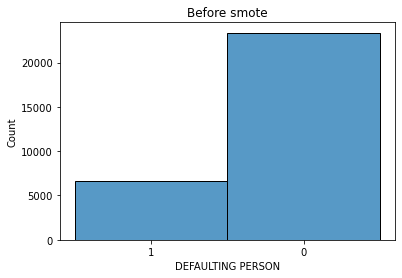

In [67]:
plt.title("Before smote")
sns.histplot(x = y_smote);

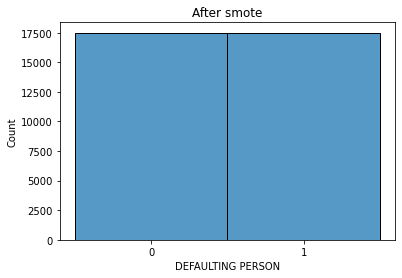

In [66]:
plt.title("After smote")
sns.histplot(x = y_train_smote);

## UNDERSAMPLING

In [68]:
df_under = df.copy()

In [69]:
x_under = df_under.drop(['DEFAULTING PERSON'], axis = 1)
y_under = df_under['DEFAULTING PERSON']

x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.25, random_state=0)

In [70]:
under = RandomUnderSampler(sampling_strategy='majority')

x_train_under, y_train_under = under.fit_resample(x_train, y_train)

In [71]:
y_under.value_counts()

0    23364
1     6636
Name: DEFAULTING PERSON, dtype: int64

In [72]:
y_train_under.value_counts()

0    5004
1    5004
Name: DEFAULTING PERSON, dtype: int64

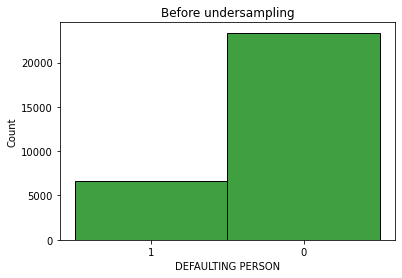

In [74]:
plt.title("Before undersampling")
sns.histplot(x = y_under, color='green');

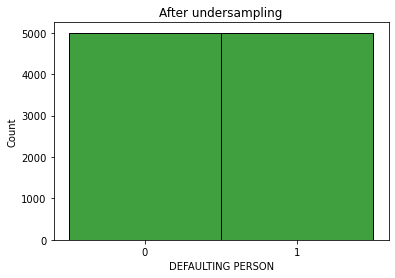

In [75]:
plt.title("After undersampling")
sns.histplot(x = y_train_under, color='green');

# SAVING THE RESULTS OF DATA PROCESSING

In [76]:
# Data unbalanced

df.to_csv("data_unbalanced_preprocessed.csv", index=None)

In [77]:
# Data balanced with SMOTE

with open('data_balanced_smote.pkl', 'wb') as f:
    pickle.dump([x_train_smote, x_test, y_train_smote, y_test], f)

In [79]:
x_train_smote.shape, y_train_smote.shape

((34992, 23), (34992,))

In [81]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

In [78]:
# Data balanced with Undersampling

with open('data_balanced_under.pkl', 'wb') as f:
    pickle.dump([x_train_under, x_test, y_train_under, y_test], f)

In [82]:
x_train_under.shape, y_train_under.shape

((10008, 23), (10008,))

In [83]:
x_test.shape, y_test.shape

((7500, 23), (7500,))